## Installs necessary libraries

In [ ]:
!pip install transformers
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Imports the pipeline from Hugging Face

In [ ]:
from transformers import pipeline

## Loads a pre-trained model for sentiment analysis

In [ ]:
sentiment_analyzer = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


## Performs sentiment analysis

In [ ]:
text = ["I love playing Tennis",
        "I love my dog but i terrible when it wet"
        ]
result = sentiment_analyzer(text)
for i in result:
    print(i)


{'label': 'POSITIVE', 'score': 0.9995906949043274}
{'label': 'NEGATIVE', 'score': 0.9948116540908813}


In [ ]:
# Step 1: Install Required Libraries
!pip install transformers
!pip install pandas
!pip install tqdm

In [ ]:
# Step 2: Import Libraries
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

In [ ]:
# Step 3: Load the Dataset
df = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Step 4: Map labels to match Hugging Face output
df['label'] = df['sentiment'].map({'positive': 'POSITIVE', 'negative': 'NEGATIVE'})

In [ ]:
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,POSITIVE
1,A wonderful little production. <br /><br />The...,positive,POSITIVE
2,I thought this was a wonderful way to spend ti...,positive,POSITIVE
3,Basically there's a family where a little boy ...,negative,NEGATIVE
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,POSITIVE


In [ ]:
# Step 5: Load Hugging Face Sentiment Pipeline
sentiment_analyzer = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")


Device set to use cpu


In [ ]:
# Step 6: Run Sentiment Analysis on a Sample
sample_df = df.sample(100, random_state=42).reset_index(drop=True)

In [ ]:
predicted_labels = []
for review in tqdm(sample_df['review']):
    result = sentiment_analyzer(review[:512])[0]  # Truncate to 512 tokens (BERT limit)
    predicted_labels.append(result['label'])


100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


In [ ]:
sample_df['predicted'] = predicted_labels

In [ ]:
# Step 7: Evaluate Accuracy
accuracy = (sample_df['predicted'] == sample_df['label']).mean()
print(f"Accuracy on 100 samples: {accuracy}%")

Accuracy on 100 samples: 0.79%


In [ ]:
# Show a few mismatches
print("\nExamples of mismatches:")
sample_df[sample_df['predicted'] != sample_df['label']][['review', 'label', 'predicted']].head(5)



Examples of mismatches:


,review,label,predicted
4,Expectations were somewhat high for me when I ...,NEGATIVE,POSITIVE
16,This is a slightly uneven entry with one stand...,POSITIVE,NEGATIVE
17,I was first introduced to John Waters films by...,POSITIVE,NEGATIVE
21,I've never really been sure whether I liked th...,POSITIVE,NEGATIVE
23,"This movie was released originally as a soft ""...",POSITIVE,NEGATIVE


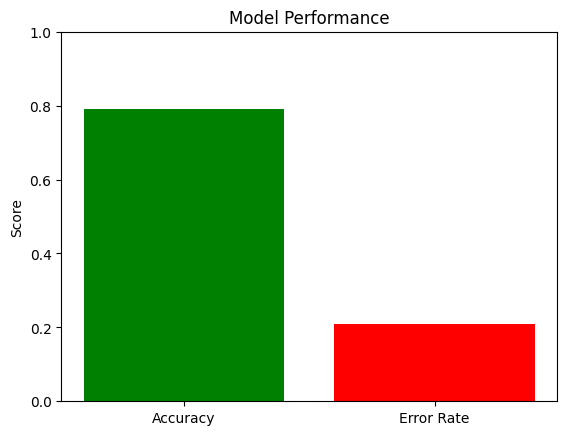

In [ ]:
accuracy = (sample_df['label'] == sample_df['predicted']).mean()
error_rate = 1 - accuracy

plt.bar(['Accuracy', 'Error Rate'], [accuracy, error_rate], color=['green', 'red'])
plt.title('Model Performance')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()


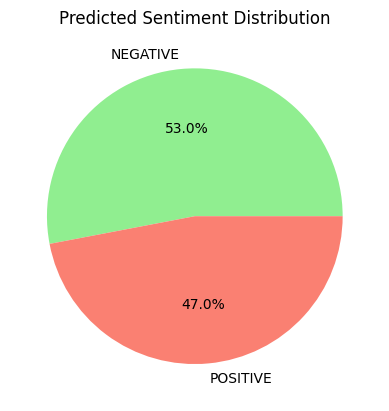

In [ ]:
sample_df['predicted'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Predicted Sentiment Distribution')
plt.ylabel('')
plt.show()
